In [12]:
import scanpy as sc
import pandas as pd
import seaborn as sns
sc.settings.set_figure_params(dpi=80, facecolor='white')

Load and normalize in vitro dataset. Only use BELA cells from cluster 2 and 3 for integration.

In [13]:
adata = sc.read_h5ad('./Data/in_vitro.h5ad')
adata_2 = adata[adata.obs.Cluster == 2]
adata_1 = adata[adata.obs.Cluster == 3]
adata = sc.concat([adata_1,adata_2])
adata = adata[adata.obs.orig_ident == 'BELAs']

adata

View of AnnData object with n_obs × n_vars = 532 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.MT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.2', 'seurat_clusters', 'Cluster', 'Sample', 'orig_ident_CellType', 'orig_ident'

In [14]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.MT,nCount_SCT,nFeature_SCT,integrated_snn_res.0.2,seurat_clusters,Cluster,Sample,orig_ident_CellType,orig_ident
AACAACCTCTCCGCAT-1,BELAs,217496.0,10552,4.866296,60769.0,8346,3,3,3,0,BELAs: 4,BELAs
ACAGGGATCCGAAATC-1,BELAs,86132.0,7735,4.851855,59820.0,7467,3,3,3,0,BELAs: 4,BELAs
ACCAACATCCTGGGAC-1,BELAs,55923.0,7162,5.568371,57725.0,7157,3,3,3,0,BELAs: 4,BELAs
ACCCTTGCACACTGGC-1,BELAs,91127.0,8297,6.259396,60076.0,7977,3,3,3,0,BELAs: 4,BELAs
ACGGAAGGTGTGTCGC-1,BELAs,149821.0,8837,5.220229,60034.0,7145,3,3,3,0,BELAs: 4,BELAs
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCGTAAGTTGA-1,BELAs,79149.0,7231,4.970372,59645.0,7152,0,0,2,0,BELAs: 3,BELAs
TTTCATGTCTCGACGG-1,BELAs,160814.0,9100,4.642009,59933.0,7167,0,0,2,0,BELAs: 3,BELAs
TTTGATCCAGAGATTA-1,BELAs,84963.0,7494,4.932735,59722.0,7337,0,0,2,0,BELAs: 3,BELAs
TTTGATCCAGAGTGAC-1,BELAs,80567.0,7643,5.715740,59846.0,7510,0,0,2,0,BELAs: 3,BELAs


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... storing 'orig.ident' as categorical
... storing 'orig_ident_CellType' as categorical
... storing 'orig_ident' as categorical


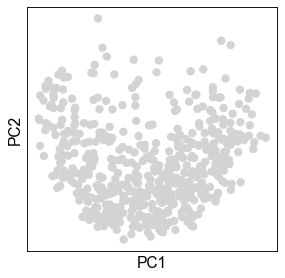

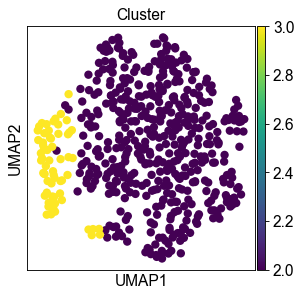

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color='Cluster')

Load embryo dataset

In [16]:
adata_ref = sc.read_h5ad('./Data/Thowfeequ_dataset/Thowfeequ.h5ad')
#adata_ref_1 = adata_ref[adata_ref.obs.annotation == 'Epi-VE']
#adata_ref_2 = adata_ref[adata_ref.obs.annotation == 'ExE-VE']
#adata_ref_3 = adata_ref[adata_ref.obs.annotation == 'anterior visceral endoderm']

#adata_ref = sc.concat([adata_ref_1,adata_ref_2, adata_ref_3])

adata_ref

AnnData object with n_obs × n_vars = 493 × 54737
    obs: 'Run.lane', 'Cell.', 'Stage', 'gene.count', 'gene.count.rpm', 'fraction.mapped', 'fraction.mito', 'fraction.spike.in', 'total.reads..log10.', 'annotation', 'Embryo_CellType', 'orig_ident'
    var: 'features'

In [17]:
#adata_ref.__dict__['_raw'].__dict__['_var'] = adata_ref.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [18]:
#adata_ref.write('./Thowfeequ_2.h5ad')

... storing 'Stage' as categorical
... storing 'annotation' as categorical
... storing 'Embryo_CellType' as categorical
... storing 'orig_ident' as categorical


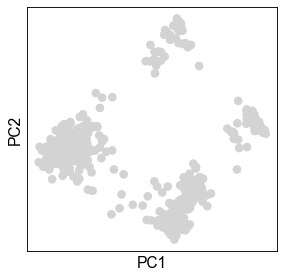

In [19]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)
sc.pp.highly_variable_genes(adata_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(adata_ref, svd_solver='arpack')
sc.pl.pca(adata_ref)

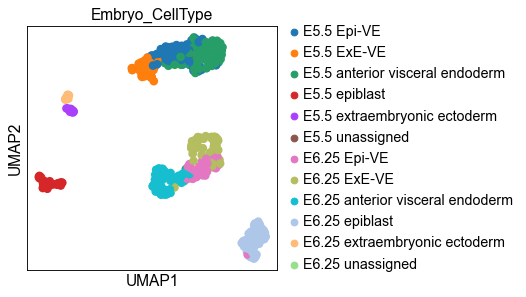

In [20]:
sc.pp.neighbors(adata_ref, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color='Embryo_CellType')

In [21]:
adata_ref

AnnData object with n_obs × n_vars = 493 × 54737
    obs: 'Run.lane', 'Cell.', 'Stage', 'gene.count', 'gene.count.rpm', 'fraction.mapped', 'fraction.mito', 'fraction.spike.in', 'total.reads..log10.', 'annotation', 'Embryo_CellType', 'orig_ident'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'Embryo_CellType_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

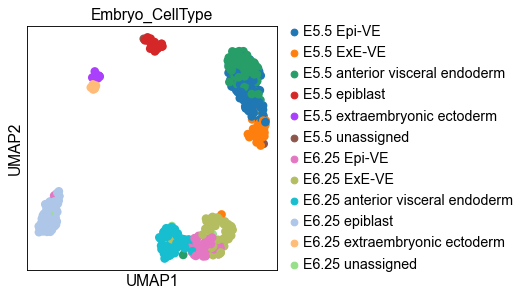

In [22]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color='Embryo_CellType')

Integrate datasets with ingest

In [34]:
sc.tl.ingest(adata, adata_ref, obs=['Embryo_CellType', 'Stage'])
adata.uns['Embryo_CellType_colors'] = adata_ref.uns['Embryo_CellType_colors']  # fix colors

In [35]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])

... storing 'Run.lane' as categorical
... storing 'orig_ident' as categorical
... storing 'orig.ident' as categorical
... storing 'orig_ident_CellType' as categorical


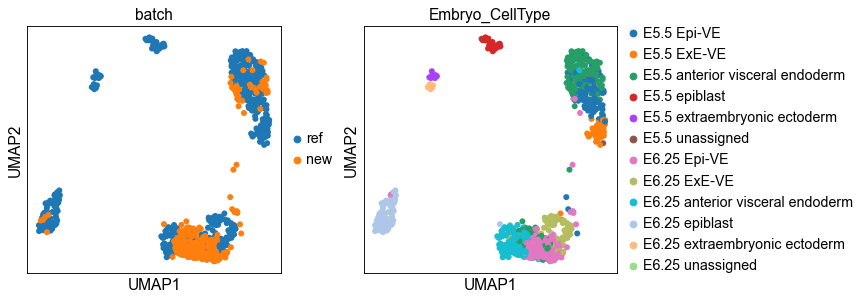

In [36]:
adata_concat.obs.Embryo_CellType = adata_concat.obs.Embryo_CellType.astype('category')
adata_concat.obs.Embryo_CellType.cat.reorder_categories(adata_ref.obs.Embryo_CellType.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['Embryo_CellType_colors'] = adata_ref.uns['Embryo_CellType_colors']  # fix category colors

sc.pl.umap(adata_concat, color=['batch', 'Embryo_CellType'])

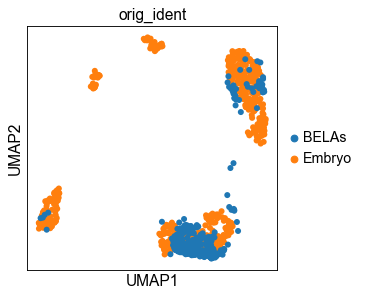

In [37]:
sc.pl.umap(adata_concat, color=['orig_ident'])

Save integrated data for visualization in R.

In [39]:
adata_query = adata_concat[adata_concat.obs.batch.isin(['new'])]
pd.crosstab(adata_query.obs.annotation, adata_query.obs.orig_ident)

orig_ident,BELAs
annotation,
Epi-VE,291
ExE-VE,2
anterior visceral endoderm,232
epiblast,7


In [40]:
#adata_concat.obs_names = [f"Cell_{i:d}" for i in range(adata_concat.n_obs)]

In [41]:
df = adata_concat.to_df()

In [42]:
df.to_csv('./Data/Thowfeequ_dataset/20230210_Ingest_invitro_BELA-VE+AVE_Thowfeequ_annotation_Stage.csv') 

In [43]:
adata_concat.write_csvs('./Data/Thowfeequ_dataset/20230210_Ingest_invitro_BELA-VE+AVE_Thowfeequ_annotation_Stage.csv', skip_data=True)

writing .csv files to Data/Thowfeequ_dataset/20230210_Ingest_invitro_BELA-VE+AVE_Thowfeequ_annotation_Stage
